# 0. 데이터 준비


## 0-1. 라이브러리 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
import shap

import plotly.express as px
from plotly.offline import plot
from plotly.subplots import make_subplots

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

## 0-2. 데이터 불러오기

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Smokalyzer/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Smokalyzer/test.csv')

In [4]:
train_df

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,159251,40,155,45,69.0,1.5,2.0,1,1,127,...,72,159,14.5,1,0.8,25,26,13,0,0
159252,159252,50,155,75,82.0,1.0,1.0,1,1,120,...,64,108,14.5,1,0.6,21,20,18,0,0
159253,159253,40,160,50,66.0,1.5,1.0,1,1,114,...,87,93,10.9,1,0.6,15,9,12,0,0
159254,159254,50,165,75,92.0,1.2,1.0,1,1,121,...,55,80,14.4,1,1.1,22,17,37,0,1


In [5]:
test_df

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,159256,40,165,70,84.0,1.2,1.2,1,1,130,...,186,49,115,14.2,1,0.9,19,25,32,0
1,159257,80,160,60,93.0,1.0,1.0,2,2,144,...,158,35,104,13.0,1,1.1,20,12,24,0
2,159258,60,170,70,86.5,0.6,0.7,1,1,117,...,173,39,88,15.4,1,1.4,38,60,36,0
3,159259,40,160,50,67.0,0.3,0.4,1,1,116,...,47,75,128,14.5,1,0.6,25,18,10,1
4,159260,40,170,75,89.4,1.0,0.9,1,1,132,...,100,39,123,16.5,1,1.0,30,39,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106166,265422,40,165,60,78.0,0.8,0.9,1,1,112,...,82,59,149,16.4,1,1.1,24,31,28,0
106167,265423,40,170,85,95.0,1.2,1.2,1,1,130,...,186,44,100,16.0,2,1.0,25,31,38,0
106168,265424,35,170,85,89.0,1.2,1.2,1,1,131,...,76,53,142,15.9,1,0.8,33,32,24,1
106169,265425,40,160,60,67.0,0.7,0.8,1,1,120,...,81,55,103,13.9,1,0.6,42,36,32,0


# 1. 탐색적 데이터 분석(EDA)

## 1-1. 데이터 구조 및 기본 정보 확인

In [6]:
train_df.info() #결측치가 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

In [7]:
# 컬럼명 표준화
rename_columns = {
    'height(cm)': 'height_cm',
    'weight(kg)': 'weight_kg',
    'waist(cm)': 'waist_cm',
    'eyesight(left)': 'eyesight_left',
    'eyesight(right)': 'eyesight_right',
    'hearing(left)': 'hearing_left',
    'hearing(right)': 'hearing_right',
    'fasting blood sugar': 'fasting_blood_sugar',
    'serum creatinine': 'serum_creatinine',
    'Urine protein': 'urine_protein',
    'dental caries': 'dental_caries'
}

train_df.rename(columns=rename_columns, inplace=True)
test_df.rename(columns=rename_columns, inplace=True)

In [8]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,159256.0,79627.500000,45973.391572,0.0,39813.75,79627.5,119441.25,159255.0
age,159256.0,44.306626,11.842286,20.0,40.00,40.0,55.00,85.0
height_cm,159256.0,165.266929,8.818970,135.0,160.00,165.0,170.00,190.0
weight_kg,159256.0,67.143662,12.586198,30.0,60.00,65.0,75.00,130.0
waist_cm,159256.0,83.001990,8.957937,51.0,77.00,83.0,89.00,127.0
eyesight_left,159256.0,1.005798,0.402113,0.1,0.80,1.0,1.20,9.9
eyesight_right,159256.0,1.000989,0.392299,0.1,0.80,1.0,1.20,9.9
hearing_left,159256.0,1.023974,0.152969,1.0,1.00,1.0,1.00,2.0
hearing_right,159256.0,1.023421,0.151238,1.0,1.00,1.0,1.00,2.0
systolic,159256.0,122.503648,12.729315,77.0,114.00,121.0,130.00,213.0


## 1-2. 타깃 변수 비율 확인

In [9]:
# Target 비율 확인
train_df['smoking'].value_counts()

,count
smoking,
0,89603
1,69653


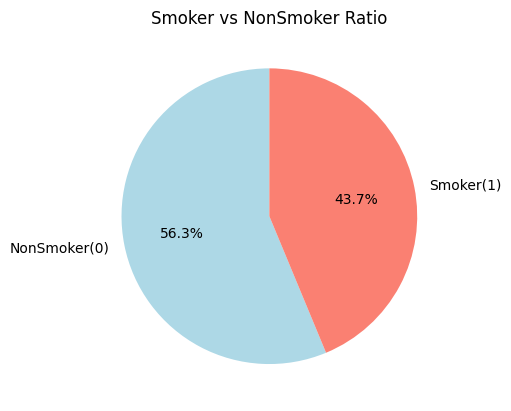

In [10]:
# Target 비율 확인 - 시각화
train_df['smoking'].value_counts().plot.pie(
    labels=['NonSmoker(0)', 'Smoker(1)'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])
plt.title('Smoker vs NonSmoker Ratio')
plt.ylabel('')
plt.show()

## 1-3. 타깃 변수와의 관계 분석
- 예) 그룹별 평균, 바이올린 플롯 등


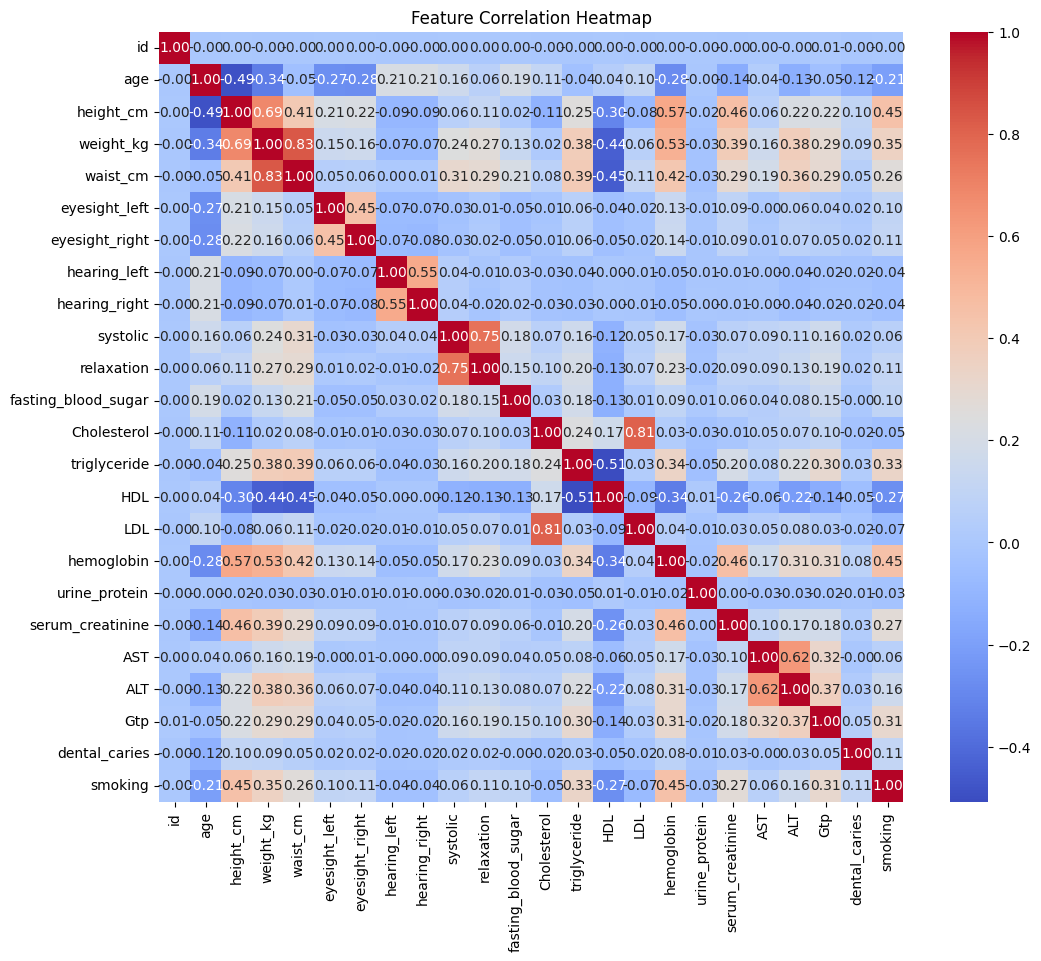

In [11]:
# 상관계수 행렬 계산
corr_matrix = train_df.corr()

# 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

## 1-4. 변수 분포 시각화 (범주형/수치형)

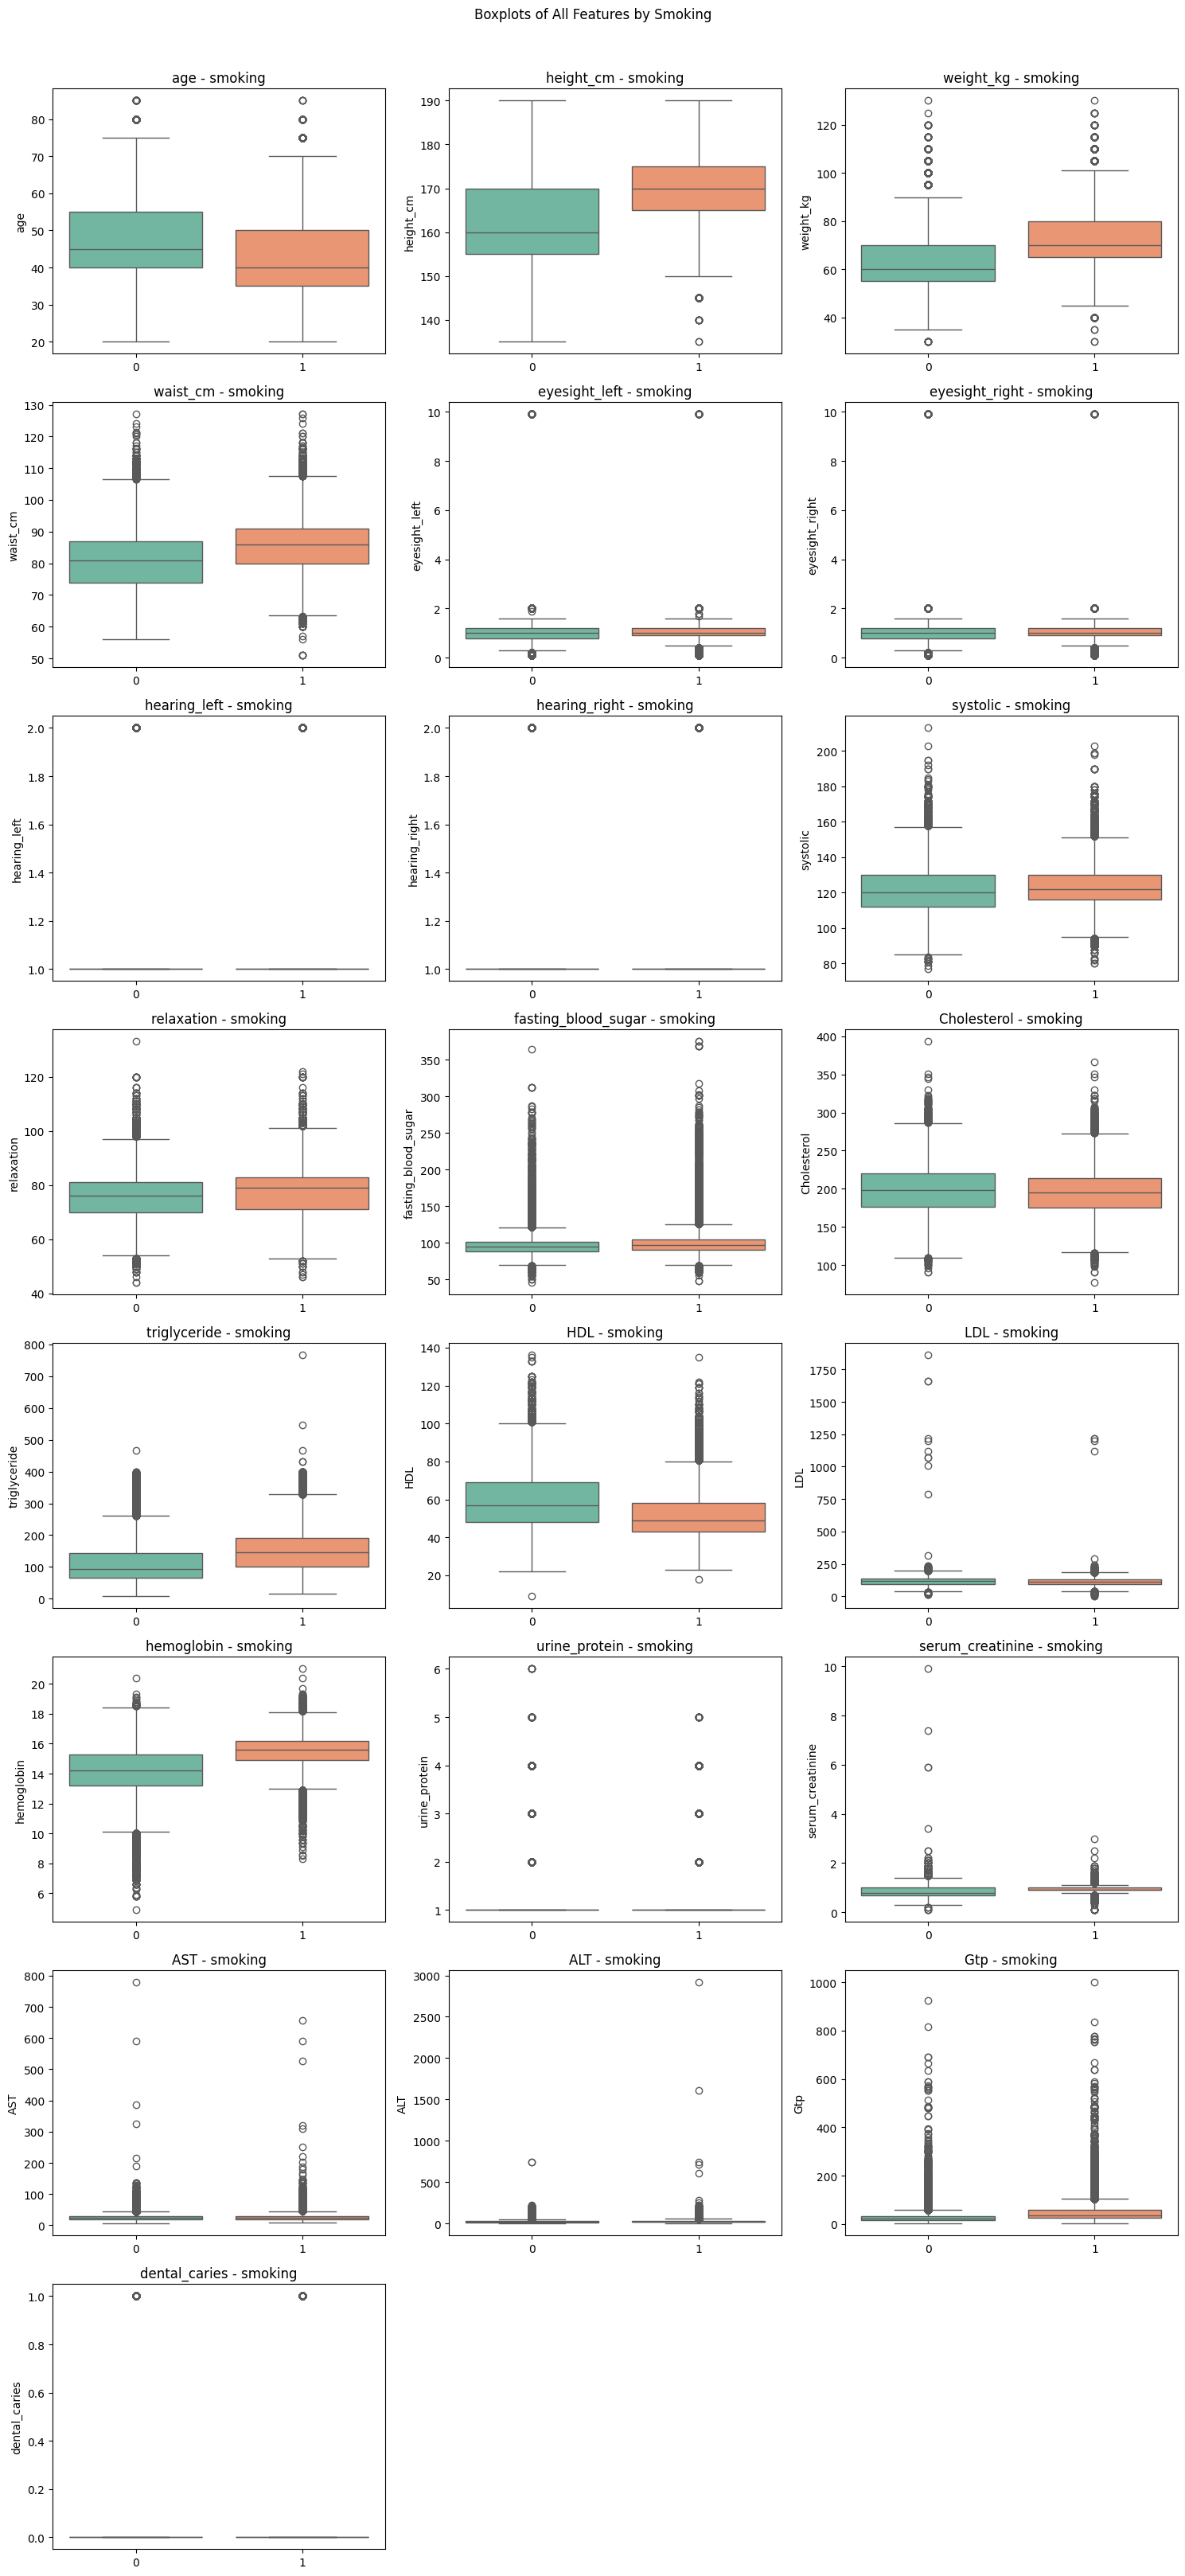

In [12]:
## boxplot
# 1. id와 smoking은 제외하고 모든 피처 선택
features = train_df.drop(columns=['id', 'smoking']).columns

# 2. subplot의 행/열
n_features = len(features)                    # 피처 개수
n_cols = 3                                    # 열 개수: 한 행에 몇 개의 그래프 그릴지
n_rows = (n_features + n_cols -1) // n_cols   # 필요한 행 개수

# 3. 캔버스 크기
plt.figure(figsize=(n_cols * 5, n_rows * 4))

# 4. 각 피처에 대해 반복하여 subplot에 boxplot 그리기
for i, col in enumerate(features, 1):
    plt.subplot(n_rows, n_cols, i)  # (행, 열, 현재 순번)에 맞는 subplot 위치 지정
    sns.boxplot(                   # boxplot으로 피처별 분포 시각화
        data=train_df,
        x='smoking',               # x축은 흡연 여부 (0 or 1)
        y=col,                     # y축은 해당 피처의 값
        palette='Set2'
    )
    plt.title(f'{col} - smoking')   # 그래프 제목
    plt.xlabel('')                  # x축 레이블 생략 (0, 1로만 표현)
    plt.tight_layout()

plt.suptitle("Boxplots of All Features by Smoking", y=1.01)

plt.tight_layout()
plt.show()

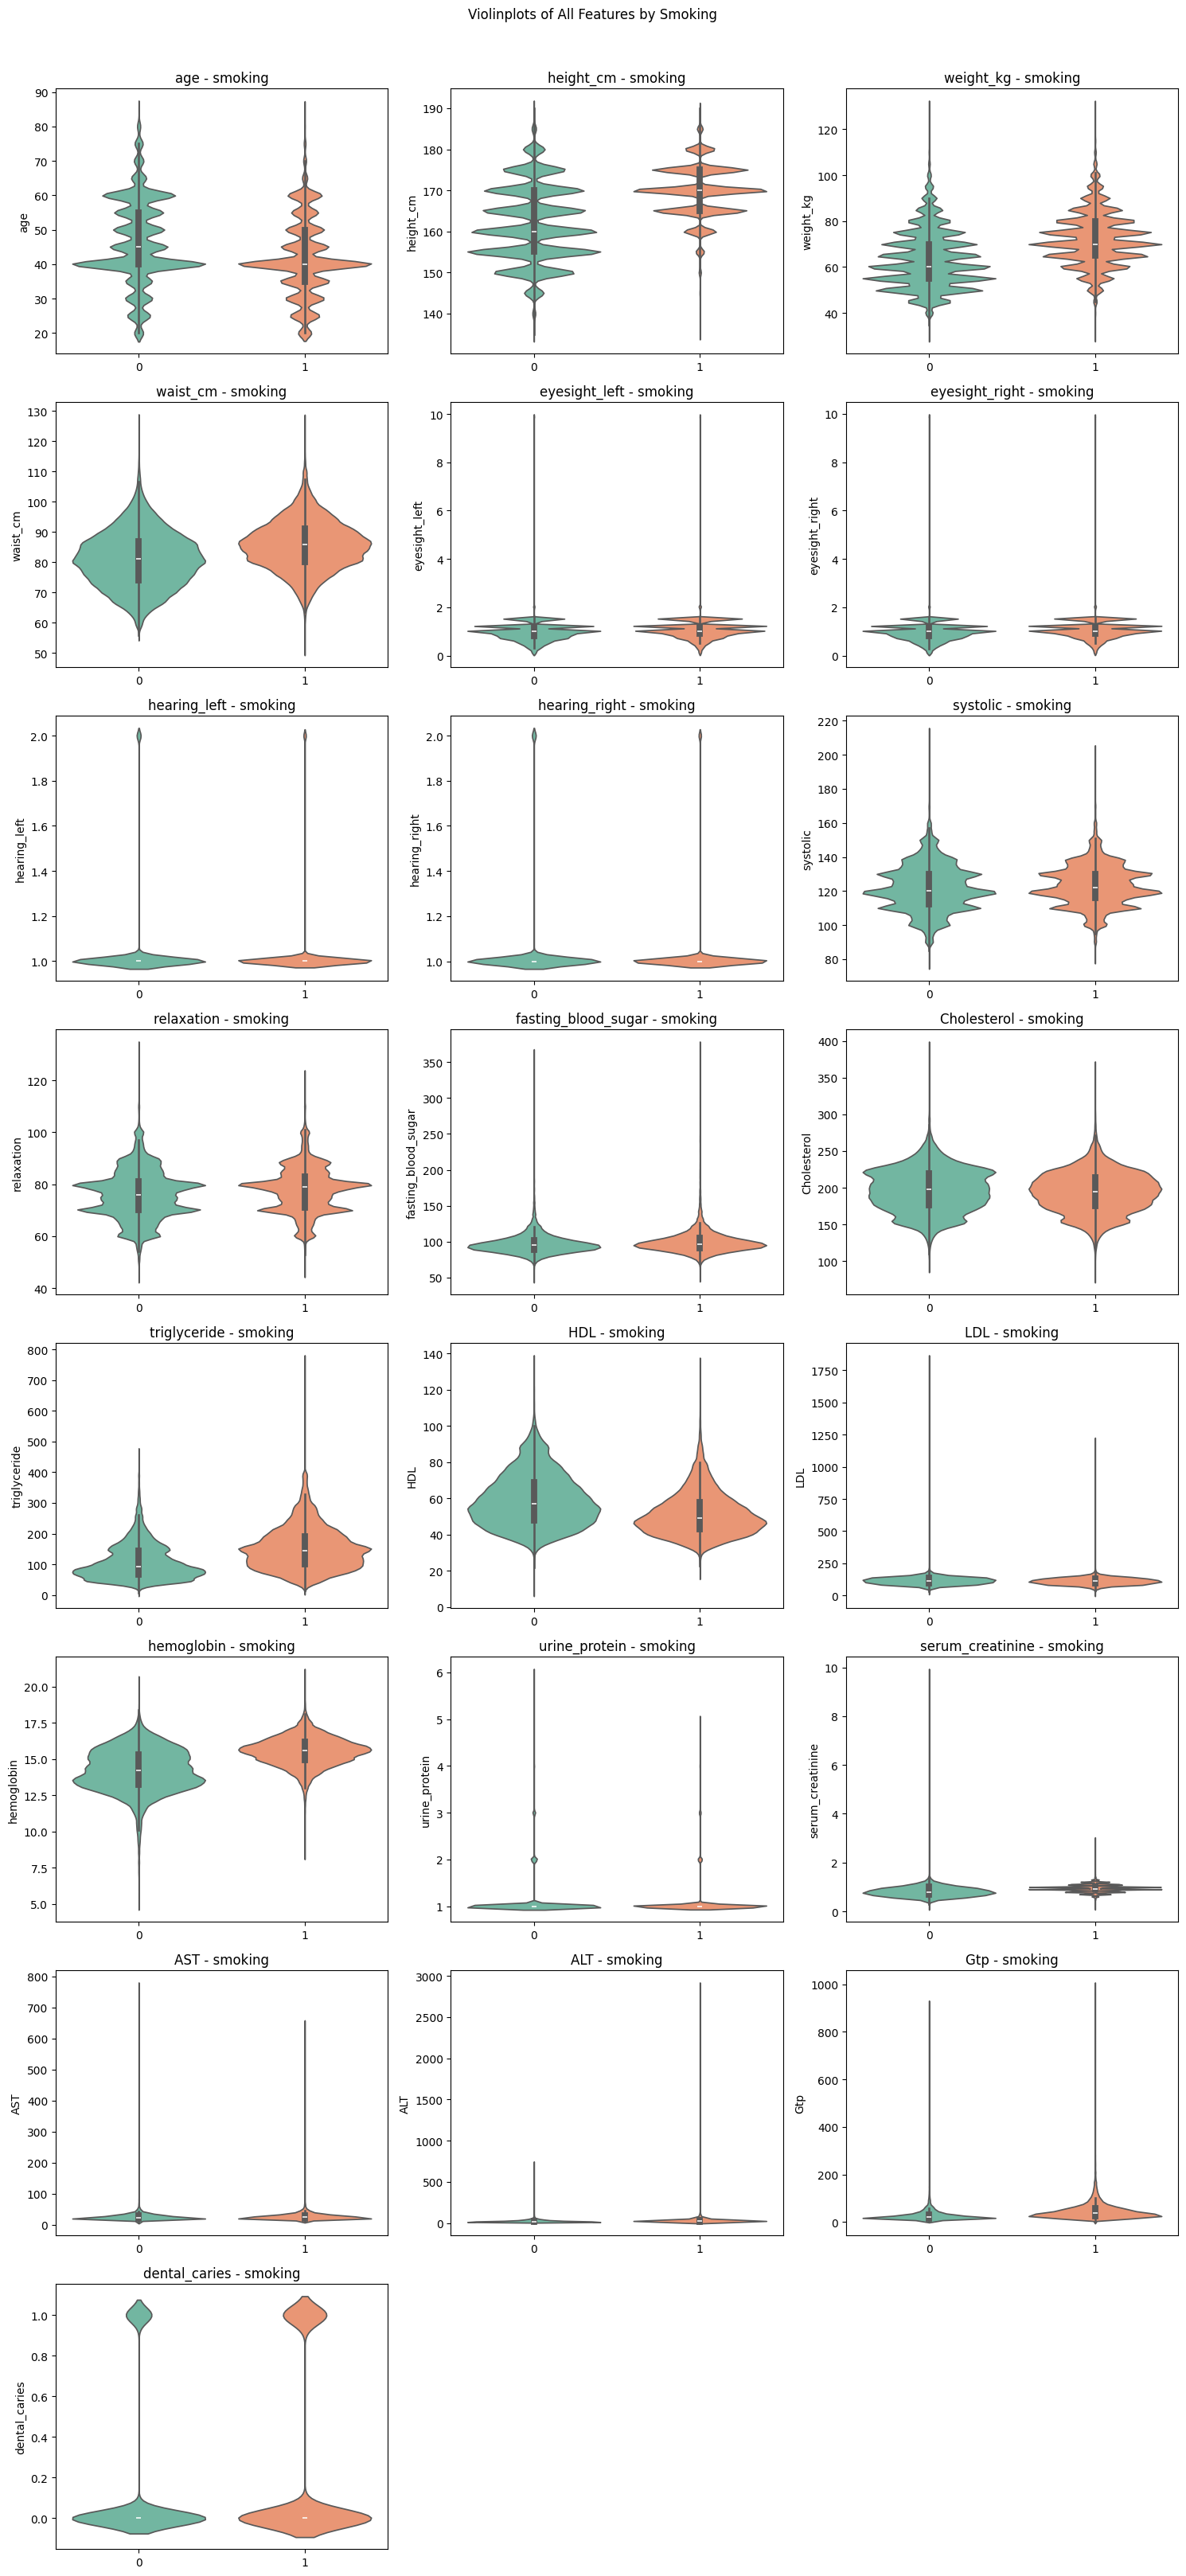

In [13]:
## Violinplot
plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.violinplot(data=train_df, x='smoking', y=col, palette='Set2', inner='box')
    plt.title(f'{col} - smoking')
    plt.xlabel('')
    plt.tight_layout()

plt.suptitle('Violinplots of All Features by Smoking', y=1.01)
plt.tight_layout()
plt.show()

[Violinplot 해석]
- 넓은 영역: 해당 구간에 데이터가 많이 분포함(밀도 높음)
- 중앙 흰색 박스: Boxplot 내장(IQR + 중앙값)
- 꼬리: 극단치나 밀도가 낮은 영역
- 좌우 대칭이 아니라면 분포가 비대칭인 것

[피처별 결과]

| 피처                                   | 해석                                           |
| ------------------------------------ | ----------------------------------------------- |
| height(cm)                       | 흡연자 그룹이 전반적으로 키가 더 크고, 분포가 더 좁게 집중됨         |
| weight(kg)                       | 흡연자 쪽이 약간 더 무거움            |
| waist(cm)                        | 흡연자 쪽 허리둘레가 큼                           |
| systolic / relaxation (혈압)       | 흡연자 쪽이 중앙값도 높고 분포도 우측으로 더 퍼져 있음             |
| Gtp / ALT / AST (간수치)            | 흡연자 쪽에 긴 꼬리(극단치)와 분포 중심 상승 → 간 기능 관련 이상 가능성 |
| LDL / Cholesterol / triglyceride | 흡연자가 높은 밀도 중심 + 더 많은 고지혈 이상치 존재             |
| HDL                 | 흡연자에서 좋은 콜레스테롤(HDL)이 더 낮음 → 일반적 생리학 패턴과 일치함 |
| fasting blood sugar | 흡연자 쪽이 약간 더 높고 이상치 더 많음, 하지만 완전히 구분되진 않음        |
| hemoglobin          | 흡연자가 살짝 더 높은 중앙값을 가짐 → 만성 저산소증 보상 가능성 있음            |

## 1-5. 상관관계 분석
- 히트맵, pariplot 등

In [14]:
## 다중공선성 확인 - VIF(Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 수치형 변수만 선택
X = train_df.drop(columns=['smoking'])  # 타겟 제외

# 상수항 추가
X = add_constant(X)

# VIF 계산
vif_df = pd.DataFrame()
vif_df['feature'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df.sort_values('VIF', ascending=False))

                feature          VIF
0                 const  1244.431309
13          Cholesterol     7.333379
4             weight_kg     6.801537
16                  LDL     6.107157
5              waist_cm     4.588011
15                  HDL     3.221739
14         triglyceride     3.001240
3             height_cm     2.914232
10             systolic     2.456500
11           relaxation     2.409581
21                  ALT     1.986468
17           hemoglobin     1.848829
2                   age     1.819872
20                  AST     1.742144
9         hearing_right     1.465960
8          hearing_left     1.464441
19     serum_creatinine     1.405493
22                  Gtp     1.335092
7        eyesight_right     1.303434
6         eyesight_left     1.295456
12  fasting_blood_sugar     1.126582
23        dental_caries     1.021530
18        urine_protein     1.005057
1                    id     1.000136


In [15]:
## 어떤 피처끼리 상관관계가 있는지 확인
# 절댓값 기준으로 상관관계 높은 쌍만 추출
threshold = 0.6    # 조절 가능
high_corr_pairs = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    # np.ones로 전부 1인 행렬 만들고 → np.triu로 위쪽 삼각형(대각선 포함)만 남기기
    # k=1은 대각선은 제외하고 위쪽만 True로 설정
    .stack()
    .reset_index()
    .rename(columns={'level_0': 'Feature 1', 'level_1': 'Feature 2', 0: 'Correlation'})
    .query('abs(Correlation) > @threshold')
    .sort_values(by='Correlation', ascending=False)
)

high_corr_pairs

,Feature 1,Feature 2,Correlation
66,weight_kg,waist_cm,0.830208
212,Cholesterol,LDL,0.808533
171,systolic,relaxation,0.753003
45,height_cm,weight_kg,0.686645
266,AST,ALT,0.623408


- 다중공선성이 5이상인 피처 [5이상이면 주의 및 확인 권장 수치]
  - Cholesterol: 7.333379
  - weight(kg): 6.801537
  - LDL: 6.107157
- 각 피처들이 어떤 피처와 연관이 있는지 확인 [0.6이상]
  - weight(kg) - waist(cm)
  - Cholesterol - LDL
  - systolic - relaxion
  - height(cm) - weight(kig)
  - AST - ALT

In [16]:
# 히트맵으로 확인
fig = px.imshow(corr_matrix,
                text_auto='.2f',
                color_continuous_scale='RdBu_r',
                zmin=-1, zmax=1,
                title='Interactive Correlation Heatmap')
fig.show()

# 2. 데이터 엔지니어링

## 2-1. 결측치, 이상치 확인 및 처리

*   결측치 없음
*   이상치 확인

    -  eyesight(left/right) 시력 수치 => 9.9는 데이터 오류 => **2로 수정**
    -  triglyceride 중성지방 최대값: 766 => 고지혈증 의심
    -  LDL 300 이상 데이터 오류=> **300으로 처리**
    -  hemoglobin =>고산 지대 적응자 산소 부족 보상으로 혈색소 증가 가능
    -  serum creatinine => 9.9 말기신부전 / 대부분 투석 중이거나 직전 상태
    -  ALT, AST 이상치 => 독성 간염, 약물 유발성 손상 1000~3000 U/L까지 가능
    -  Gtp 500 ~ 999 => 중증 간질환, 알코올성 간질환, 간종양, 담관 폐쇄 등 가능
* 이상치 처리 (데이터 오류)
 - eyesight(left/right) : 9.9 => 2
 - LDL : 300 이상 => 300



**eyesight(left/right) 시력 수치 => 9.9는 데이터 오류 => 2로 수정**

In [17]:
# test용 - 추후 셀 제거
train_df = pd.read_csv('/content/drive/MyDrive/DS/Datathon/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/DS/Datathon/test.csv')

# 컬럼명 표준화
rename_columns = {
    'height(cm)': 'height_cm',
    'weight(kg)': 'weight_kg',
    'waist(cm)': 'waist_cm',
    'eyesight(left)': 'eyesight_left',
    'eyesight(right)': 'eyesight_right',
    'hearing(left)': 'hearing_left',
    'hearing(right)': 'hearing_right',
    'fasting blood sugar': 'fasting_blood_sugar',
    'serum creatinine': 'serum_creatinine',
    'Urine protein': 'urine_protein',
    'dental caries': 'dental_caries'
}

train_df.rename(columns=rename_columns, inplace=True)
test_df.rename(columns=rename_columns, inplace=True)

In [18]:
# 시력값 상한 처리: 2.0 초과 값은 2.0으로 클리핑
max_eyesight = 2.0

# 변환 전 2.0 초과 데이터 개수 확인
left_exceed = train_df[train_df['eyesight_left'] > max_eyesight].shape[0]
right_exceed = train_df[train_df['eyesight_right'] > max_eyesight].shape[0]

print(f'2.0 초과 시력 (왼쪽): {left_exceed}개')
print(f'2.0 초과 시력 (오른쪽): {right_exceed}개')

# 클리핑 처리
train_df['eyesight_left'] = train_df['eyesight_left'].clip(upper=max_eyesight)
train_df['eyesight_right'] = train_df['eyesight_right'].clip(upper=max_eyesight)

# 처리 후 데이터 개수 확인 (선택적)
left_valid = train_df[train_df['eyesight_left'] <= max_eyesight].shape[0]
right_valid = train_df[train_df['eyesight_right'] <= max_eyesight].shape[0]
print(f'변환 후 왼쪽 시력 ≤ 2.0: {left_valid}개')
print(f'변환 후 오른쪽 시력 ≤ 2.0: {right_valid}개')



# LDL 수치 상한값 설정 및 이상치 처리
ldl_threshold = 300

# 처리 전 이상치 개수 확인
ldl_exceed = train_df[train_df['LDL'] > ldl_threshold].shape[0]
print(f'처리 전 300 초과 LDL 수치 개수: {ldl_exceed}개')

# 이상치 클리핑 처리
train_df['LDL'] = train_df['LDL'].clip(upper=ldl_threshold)

# 처리 후 정상 범위 내 데이터 수 확인 (선택적)
ldl_valid = train_df[train_df['LDL'] <= ldl_threshold].shape[0]
print(f'처리 후 300 이하 LDL 수치 개수: {ldl_valid}개')

2.0 초과 시력 (왼쪽): 132개
2.0 초과 시력 (오른쪽): 117개
변환 후 왼쪽 시력 ≤ 2.0: 159256개
변환 후 오른쪽 시력 ≤ 2.0: 159256개
처리 전 300 초과 LDL 수치 개수: 15개
처리 후 300 이하 LDL 수치 개수: 159256개


**LDL 300 이상 데이터 오류=> 300으로 처리**

In [19]:
# LDL 수치 상한값 설정 및 이상치 처리
ldl_threshold = 300

# 처리 전 이상치 개수 확인
ldl_exceed = train_df[train_df['LDL'] > ldl_threshold].shape[0]
print(f'처리 전 300 초과 LDL 수치 개수: {ldl_exceed}개')

# 이상치 클리핑 처리
train_df['LDL'] = train_df['LDL'].clip(upper=ldl_threshold)

# 처리 후 정상 범위 내 데이터 수 확인 (선택적)
ldl_valid = train_df[train_df['LDL'] <= ldl_threshold].shape[0]
print(f'처리 후 300 이하 LDL 수치 개수: {ldl_valid}개')

처리 전 300 초과 LDL 수치 개수: 0개
처리 후 300 이하 LDL 수치 개수: 159256개


In [20]:
# # 이상치 클리핑 로직인데 혹시나 해서 넣어봤습니다

# import matplotlib.pyplot as plt
# import seaborn as sns
# import math

# # 'id' 제외
# numerical_cols = [
#     col for col in train_df.columns
#     if (train_df[col].dtype in ['int64', 'float64']) and (col != 'id')
# ]

# # 클리핑 전 백업
# train_df_before = train_df.copy()

# # 클리핑 수행
# clip_bounds = {}
# for col in numerical_cols:
#     lower = train_df[col].quantile(0.01)
#     upper = train_df[col].quantile(0.99)
#     clip_bounds[col] = (lower, upper)
#     train_df[col] = train_df[col].clip(lower, upper)

# # 시각화 (3개씩 나눠서)
# cols_per_page = 3
# num_cols = len(numerical_cols)
# num_pages = math.ceil(num_cols / cols_per_page)

# for page in range(num_pages):
#     start = page * cols_per_page
#     end = min(start + cols_per_page, num_cols)
#     sub_cols = numerical_cols[start:end]

#     fig, axes = plt.subplots(len(sub_cols), 2, figsize=(14, 4 * len(sub_cols)))
#     if len(sub_cols) == 1:
#         axes = [axes]  # 1개일 때 처리

#     for i, col in enumerate(sub_cols):
#         lower, upper = clip_bounds[col]
#         xmin = min(train_df_before[col].min(), train_df[col].min())
#         xmax = max(train_df_before[col].max(), train_df[col].max())

#         # Before Clipping
#         sns.histplot(train_df_before[col], bins=50, kde=True, ax=axes[i][0])
#         axes[i][0].axvline(lower, color='red', linestyle='--', label='1% quantile')
#         axes[i][0].axvline(upper, color='green', linestyle='--', label='99% quantile')
#         axes[i][0].set_title(f'[Before Clipping] {col}')
#         axes[i][0].set_xlim(xmin, xmax)
#         axes[i][0].legend()

#         # After Clipping
#         sns.histplot(train_df[col], bins=50, kde=True, ax=axes[i][1])
#         axes[i][1].axvline(lower, color='red', linestyle='--', label='1% quantile')
#         axes[i][1].axvline(upper, color='green', linestyle='--', label='99% quantile')
#         axes[i][1].set_title(f'[After Clipping] {col}')
#         axes[i][1].set_xlim(xmin, xmax)
#         axes[i][1].legend()

#     plt.tight_layout()
#     plt.show()

## 2-2. 피처 엔지니어링(컬럼 생성,삭제 등)

### 2.2.1 Gender

In [21]:
# 원본 데이터셋을 이용해서 gender 피처 생성
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download('kukuroo3/body-signal-of-smoking')

smoking_orig = pd.read_csv(path + '/' + os.listdir(path)[0])
print(smoking_orig.info())
smoking_orig.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [22]:
new_features = []

In [23]:
smoking_orig.columns

Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking'],
      dtype='object')

In [24]:
# 컬럼명 표준화
rename_columns = {
    'ID':'id',
    'height(cm)': 'height_cm',
    'weight(kg)': 'weight_kg',
    'waist(cm)': 'waist_cm',
    'eyesight(left)': 'eyesight_left',
    'eyesight(right)': 'eyesight_right',
    'hearing(left)': 'hearing_left',
    'hearing(right)': 'hearing_right',
    'fasting blood sugar': 'fasting_blood_sugar',
    'serum creatinine': 'serum_creatinine',
    'Urine protein': 'urine_protein',
    'dental caries': 'dental_caries'
}

smoking_orig.rename(columns=rename_columns, inplace=True)

In [25]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate

# gender 예측을 위한 입력 데이터(X)와 타겟(y) 정의
X_0 = smoking_orig.drop(columns=['gender', 'oral', 'tartar', 'smoking'])  # 예측에 불필요한 컬럼 제거. oral-구강검진 여부/tartar-치석상태 검진
y_0 = smoking_orig['gender'].map({'F': 0, 'M': 1})  # 성별 문자 → 숫자로 인코딩 (F:0, M:1)

# Stratified K-Fold 교차 검증 설정 (성별 비율 유지)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# XGBoost로 성별 예측 모델 학습 + 교차 검증으로 AUC 평가
gender_model_results = cross_validate(
    XGBClassifier(n_jobs=-1, random_state=42),  # XGBoost 분류기 정의
    X_0, y_0,                        # 입력/타겟 전달
    scoring='roc_auc',                         # 평가 지표: AUC
    cv=kfold,                                   # Stratified 5-fold 교차 검증
    return_estimator=True                      # 학습된 모델들을 반환
)

# AUC 평균 및 표준편차 출력 (성능 확인)
print(f"AUC mean: {gender_model_results['test_score'].mean():.4f}, {gender_model_results['test_score'].std():.4f}")

AUC mean: 0.9972, 0.0004


In [26]:
# train_df와 smoking_orig의 공통 컬럼을 기준으로 예측에 사용할 feature 선택
target_features = [col for col in X_0.columns if col in train_df.columns]

# 초기화
train_df['gender'] = 0

# 각 fold의 모델을 활용하여 남성일 확률 예측 → 평균
for clf in gender_model_results['estimator']:
    train_df['gender'] += clf.predict_proba(train_df[target_features])[:, 1]

# 평균 확률로 정규화
train_df['gender'] /= len(gender_model_results['estimator'])

# test 데이터에도 동일한 방식으로 gender 확률값 추가
test_df['gender'] = 0  # 초기화
for clf in gender_model_results['estimator']:
    test_df['gender'] += clf.predict_proba(test_df[target_features])[:, 1]
test_df['gender'] /= len(gender_model_results['estimator'])

# new_features 리스트에 추가
new_features.append('gender')

In [27]:
# 0~1 사이 확률로 들어 있음 (남성일 확률)
train_df['gender'].describe()

,gender
count,1.592560e+05
mean,6.793589e-01
std,4.506190e-01
min,3.088894e-07
25%,1.626315e-02
50%,9.991833e-01
75%,9.999852e-01
max,1.000000e+00


<Axes: >

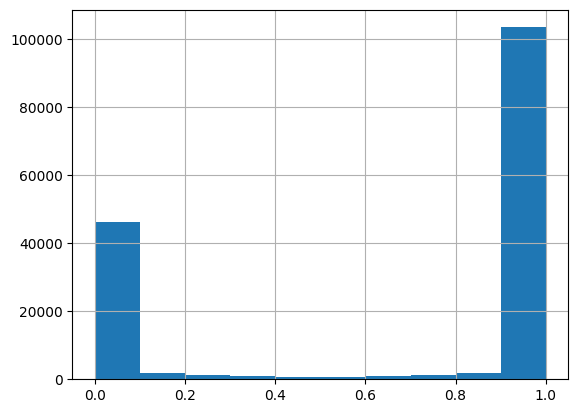

In [28]:
train_df['gender'].hist()

In [29]:
# # gender_binary: 성별 이진 분류 - 주리님
# # 0.5 이상이면 남성(1), 아니면 여성(0)으로 설정
# train_df['gender_binary'] = (train_df['gender'] >= 0.5).astype(int)

### 2.2.5 다중공선성 확인

In [30]:
# ID 제거
train_df.drop(columns='id', inplace=True)
test_df.drop(columns='id', inplace=True)

## 2-3. 피처 엔지니어링에 대한 시각화

<br>
<br>

# 3. 데이터 분리 및 전처리

## 3-1. 학습/검증 데이터 분리(train/test split)

- train/test 데이터 분리 함수

In [31]:
from sklearn.model_selection import train_test_split

def get_train_test_dataset(df):
    """
    이진 분류용 데이터셋에서 feature/target 분리 후,
    학습용/검증용 데이터로 분할하는 함수

    Parameters
    ----------
    df : pd.DataFrame
        전처리 완료된 학습용 데이터프레임 (smoking 포함)

    Returns
    -------
    X_train : pd.DataFrame
        학습용 feature 데이터
    X_test : pd.DataFrame
        테스트용 feature 데이터 (성능 평가용)
    y_train : pd.Series
        학습용 타겟 값
    y_test : pd.Series
        테스트용 타겟 값
    """

    df_copy = df.copy()

    # feature/target 분리
    X_features = df_copy.drop(columns='smoking')
    y_target = df_copy['smoking']

    # stratified split
    X_train, X_test, y_train, y_test = train_test_split(
        X_features, y_target,
        test_size=0.3,
        random_state=42,
        stratify=y_target
    )

    return X_train, X_test, y_train, y_test

- train/test 데이터 분리

In [32]:
# 데이터 전처리 후, feature/label 분리 후 train/test 셋 분리
X_train, X_test, y_train, y_test = get_train_test_dataset(train_df)

In [33]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print()
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)
print()
print('원본 전체 데이터 비율')
print(train_df['smoking'].value_counts(normalize=True) * 100)

학습 데이터 레이블 값 비율
smoking
0    56.263512
1    43.736488
Name: count, dtype: float64

테스트 데이터 레이블 값 비율
smoking
0    56.263474
1    43.736526
Name: count, dtype: float64

원본 전체 데이터 비율
smoking
0    56.2635
1    43.7365
Name: proportion, dtype: float64


## 3-2. 전처리

- 결측값 처리  
- 인코딩 (LabelEncoder, OneHotEncoder 등)  
- 스케일링 (StandardScaler, MinMaxScaler 등)  
- 파이프라인(Pipeline) 구성 (추천)  

<br>
<br>

# 4. 모델 학습

## 4.1 평가 함수 정의


- 평가 지표 출력 함수

In [34]:
# 성능 저장 리스트
model_score = []

In [35]:
def get_clf_eval(y_test, pred, pred_proba=None, model_name=None):
    """
    이진 분류 모델의 주요 성능 지표를 출력하는 평가 함수

    Parameters
    ----------
    y_test : array-like
        실제 레이블 값 (정답)
    pred : array-like
        분류 모델의 예측 결과 (0 또는 1)
    pred_proba : array-like, optional
        클래스 1에 대한 예측 확률 (ROC-AUC 계산용)

    Returns
    -------
    None
        평가 지표를 출력만 하고 반환값은 없음

    출력 내용
    -------
    - 오차 행렬 (Confusion Matrix)
    - 정확도 (Accuracy)
    - 정밀도 (Precision)
    - 재현율 (Recall)
    - F1 스코어
    - ROC-AUC (클래스 1의 예측 확률 기반)
    """

    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba) if pred_proba is not None else None

    print(f'{model_name} 결과')
    print('Confusion Matrix:')
    print(confusion)
    print(f'Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}')
    if roc_auc is not None:
        print(f'ROC-AUC: {roc_auc:.4f}')

    # 결과 저장
    model_score.append({
        'Model': model_name,
        'Accuracy': round(accuracy, 4),
        'Precision': round(precision, 4),
        'Recall': round(recall, 4),
        'F1': round(f1, 4),
        'ROC-AUC': round(roc_auc, 4) if roc_auc is not None else None
    })

- 모델 학습 및 평가 함수

In [36]:
from lightgbm import LGBMRegressor, early_stopping, log_evaluation
from xgboost import XGBRegressor

def get_model_train_eval(model, model_name, ftr_train, ftr_test, tgt_train, tgt_test):
    """
    모델 학습 및 평가 수행 함수
    - LightGBM, XGBoost는 early stopping 자동 적용

    Parameters
    ----------
    model : classifier model object
        학습 및 예측에 사용할 분류 모델 객체
    ftr_train : array-like
        학습용 feature 데이터
    ftr_test : array-like
        테스트용 feature 데이터
    tgt_train : array-like
        학습용 target 값
    tgt_test : array-like
        테스트용 target 값

    Returns
    -------
    없음 (내부에서 평가 결과를 출력함)
    """

    eval_set = [(ftr_train, tgt_train), (ftr_test, tgt_test)]

    if isinstance(model, LGBMClassifier):
        model.fit(ftr_train, tgt_train,
                  eval_set=eval_set,
                  eval_metric='auc',
                  callbacks=[early_stopping(100, verbose=False), log_evaluation(period=0)])
    elif isinstance(model, XGBClassifier):
        model.fit(ftr_train, tgt_train,
                  eval_set=eval_set,
                  verbose=False)
    else:
        model.fit(ftr_train, tgt_train)

    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba, model_name=model_name)

<br>

## 4-2. 베이스라인 모델 학습
- LogisticsRegression, DecisionTree 등

- 모델 객체 생성

In [37]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

log_clf = LogisticRegression(max_iter=1000)  # 수렴 실패 방지

lgbm_clf = LGBMClassifier(boost_from_average=False,  # 불균형 데이터이므로 모델 자체 학습 유도
                          # force_row_wise=True,     # 멀티스레딩 경고 로그 제거
                          random_state=42,
                          n_jobs=-1,
                          verbosity=-1
                         )

xgb_clf = XGBClassifier(eval_metric='auc',
                        early_stopping_rounds=10,
                        use_label_encoder=False,
                        random_state=42,
                        n_jobs=-1
                       )

rf_clf = RandomForestClassifier(random_state=42, n_jobs=-1)
dt_clf = DecisionTreeClassifier(random_state=42)
knn_clf  = KNeighborsClassifier()
ada_clf = AdaBoostClassifier(random_state=42)

<br>

- LogisticRegression

In [38]:
# LogisticRegression
get_model_train_eval(model=log_clf,
                     model_name='LogisticRegression',
                     ftr_train=X_train,
                     ftr_test=X_test,
                     tgt_train=y_train,
                     tgt_test=y_test
                     )

LogisticRegression 결과
Confusion Matrix:
[[19132  7749]
 [ 3700 17196]]
Accuracy: 0.7604, Precision: 0.6894, Recall: 0.8229, F1: 0.7502
ROC-AUC: 0.8419


- LightGBM

In [39]:
# LightGBM
get_model_train_eval(model=lgbm_clf,
                     model_name='LightGBM',
                     ftr_train=X_train,
                     ftr_test=X_test,
                     tgt_train=y_train,
                     tgt_test=y_test
                     )

LightGBM 결과
Confusion Matrix:
[[20192  6689]
 [ 3816 17080]]
Accuracy: 0.7801, Precision: 0.7186, Recall: 0.8174, F1: 0.7648
ROC-AUC: 0.8639


- XGBoost

In [40]:
# XGBoost
get_model_train_eval(model=xgb_clf,
                     model_name='XGBoost',
                     ftr_train=X_train,
                     ftr_test=X_test,
                     tgt_train=y_train,
                     tgt_test=y_test
                     )

XGBoost 결과
Confusion Matrix:
[[20193  6688]
 [ 3899 16997]]
Accuracy: 0.7784, Precision: 0.7176, Recall: 0.8134, F1: 0.7625
ROC-AUC: 0.8629


- RandomForest

In [41]:
# RandomForest
get_model_train_eval(model=rf_clf,
                     model_name='RandomForest',
                     ftr_train=X_train,
                     ftr_test=X_test,
                     tgt_train=y_train,
                     tgt_test=y_test
                     )

RandomForest 결과
Confusion Matrix:
[[20011  6870]
 [ 3903 16993]]
Accuracy: 0.7745, Precision: 0.7121, Recall: 0.8132, F1: 0.7593
ROC-AUC: 0.8561


- DecisionTree

In [42]:
# # DecisionTree
# get_model_train_eval(model = dt_clf,
#                      model_name='DecisionTree',
#                      ftr_train=X_train,
#                      ftr_test=X_test,
#                      tgt_train=y_train,
#                      tgt_test=y_test
#                      )

- KNN

In [43]:
# # KNN
# get_model_train_eval(model = knn_clf,
#                      model_name='KNN',
#                      ftr_train=X_train,
#                      ftr_test=X_test,
#                      tgt_train=y_train,
#                      tgt_test=y_test
#                      )

- AdaBoost

In [44]:
# AdaBoost
get_model_train_eval(model = ada_clf,
                     model_name='AdaBoost',
                     ftr_train=X_train,
                     ftr_test=X_test,
                     tgt_train=y_train,
                     tgt_test=y_test
                     )

AdaBoost 결과
Confusion Matrix:
[[19559  7322]
 [ 3739 17157]]
Accuracy: 0.7685, Precision: 0.7009, Recall: 0.8211, F1: 0.7562
ROC-AUC: 0.8511


<br>

- Baseline 모델 성능 비교
    - 하이퍼파라미터 튜닝 전 모델 초기 성능 평가
    - 이후 하이퍼파라미터 튜닝 시 기준선으로 활용

In [45]:
model_score_df = pd.DataFrame(model_score)
model_score_df

,Model,Accuracy,Precision,Recall,F1,ROC-AUC
0,LogisticRegression,0.7604,0.6894,0.8229,0.7502,0.8419
1,LightGBM,0.7801,0.7186,0.8174,0.7648,0.8639
2,XGBoost,0.7784,0.7176,0.8134,0.7625,0.8629
3,RandomForest,0.7745,0.7121,0.8132,0.7593,0.8561
4,AdaBoost,0.7685,0.7009,0.8211,0.7562,0.8511


In [46]:
model_sorted_df = model_score_df.sort_values(
    by=['ROC-AUC', 'Recall', 'Precision', 'F1'],
    ascending=False
)
model_sorted_df

,Model,Accuracy,Precision,Recall,F1,ROC-AUC
1,LightGBM,0.7801,0.7186,0.8174,0.7648,0.8639
2,XGBoost,0.7784,0.7176,0.8134,0.7625,0.8629
3,RandomForest,0.7745,0.7121,0.8132,0.7593,0.8561
4,AdaBoost,0.7685,0.7009,0.8211,0.7562,0.8511
0,LogisticRegression,0.7604,0.6894,0.8229,0.7502,0.8419


In [47]:
# 모델 성능 결과 초기화 - 필요 시 실행
model_score.clear()
model_score_df = pd.DataFrame(model_score)
model_sorted_df = pd.DataFrame(model_score)

## 4-3. Feature Selection (중요 변수 선별) SHAP

In [ ]:
# # LightGBM explainer
# explainer_lgbm = shap.Explainer(lgbm_clf, X_train)  # 또는 TreeExplainer 사용 가능
# shap_values_lgbm = explainer_lgbm(X_train)  # 13분 소요

# # Summary plot for LightGBM
# shap.summary_plot(shap_values_lgbm, X_train, show=True)

In [ ]:
# # XGBoost explainer
# explainer_xgb = shap.Explainer(xgb_clf)  # best_xgb_model은 학습된 XGBoost 모델
# shap_values_xgb = explainer_xgb(X_train) # 2분 소요

# # Summary plot for XGBoost
# shap.summary_plot(shap_values_xgb, X_train, show=True)

In [ ]:
# ## 두 모델의 중요 변수 비교 (Bar Plot 버전)

# # 서브플롯 설정 (1행 2열)
# fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# # XGBoost bar plot
# shap.plots.bar(shap_values_xgb, max_display=10, show=False)
# axes[0].set_title('XGBoost - Top 10 Important Features (SHAP)')
# plt.sca(axes[0])  # 현재 axes 지정
# shap.plots.bar(shap_values_xgb, max_display=10, show=False)

# # LightGBM bar plot
# plt.sca(axes[1])  # 오른쪽 subplot에 출력
# shap.plots.bar(shap_values_lgbm, max_display=10, show=False)
# axes[1].set_title('LightGBM - Top 10 Important Features (SHAP)')

# plt.tight_layout()
# plt.show()

## 4-4. 교차 검증
- Kfold, StratifiedKfold, cross_val_score 등

## 4-5. 하이퍼파라미터 튜닝
- GridSearchCV, RandomizedSearch CV 등

- early stopping 파라미터 반환 함수

    - 하이퍼파라미터 튜닝 중인 모델이 XGBoost 또는 LightGBM일 경우, 조기 종료(early stopping)와 평가 지표(log evaluation)를 위한 추가 학습 인자(fit_params)를 자동으로 설정해 준다.

In [48]:
def get_fit_params_with_early_stopping(model, X_train, X_test, y_train, y_test):
    """
    GridSearchCV/RandomizedSearchCV의 fit() 호출 시 사용할 fit_params 반환

    Parameters
    ----------
    model : 학습 대상 모델 객체
    X_train, X_test, y_train, y_test : 학습/평가 데이터

    Returns
    -------
    fit_params : dict
        모델 학습 시 fit()에 전달할 파라미터
    """

    eval_set = [(X_train, y_train), (X_test, y_test)]

    if isinstance(model, LGBMClassifier):
        return {
            'eval_set': eval_set,
            'eval_metric': 'auc',
            'callbacks': [
                early_stopping(stopping_rounds=100, verbose=False),
                log_evaluation(period=0)
            ]
        }

    elif isinstance(model, XGBClassifier):
        return {
            'eval_set': eval_set,
            'verbose': False
        }

    else:
        # 일반 모델은 fit_params 없이 return
        return {}

- 튜닝된 최적 모델 평가 함수

In [49]:
from sklearn.metrics import classification_report, roc_auc_score

def evaluate_best_model(grid_cv, X_test, y_test):
    """
    GridSearchCV/RandomizedSearchCV로 튜닝된 최적 모델을 테스트 세트에 대해 평가하는 함수

    Parameters
    ----------
    grid_cv : GridSearchCV 또는 RandomizedSearchCV 객체 (fit 완료된 상태)
    X_test : 테스트 피처
    y_test : 테스트 타겟

    Prints
    ------
    - 최적 하이퍼파라미터
    - 교차 검증 기반 Best F1 score
    - 테스트 ROC-AUC
    - 테스트 데이터의 classification_report: precision, recall, f1-score, support
    """

    print('Best Hyperparameters:', grid_cv.best_params_)
    print('Best F1 Score:', grid_cv.best_score_)

    best_model = grid_cv.best_estimator_
    pred = best_model.predict(X_test)
    pred_proba = best_model.predict_proba(X_test)[:, 1]

    print('Test ROC-AUC:', roc_auc_score(y_test, pred_proba))
    print(classification_report(y_test, pred))

    return best_model

<br>

- GridSearch: LightGBM

In [50]:
# from lightgbm import LGBMClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report, roc_auc_score

# # 튜닝 대상 파라미터
# lgbm_params = {
#     'n_estimators': [100, 200],
#     'learning_rate': [0.05, 0.1],
#     'max_depth': [3, 5, 7],
#     # 'num_leaves': [31, 64],
#     }

# # 모델 정의
# lgbm_clf = LGBMClassifier(boost_from_average=False,
#                           random_state=42,
#                           n_jobs=-1,
#                           verbosity=-1
#                          )

# # 조기 종료용 fit_params
# fit_params = get_fit_params_with_early_stopping(lgbm_clf, X_train, X_test, y_train, y_test)

# # GridSearchCV 정의
# grid_cv_lgbm = GridSearchCV(lgbm_clf, lgbm_params, cv=3, scoring='f1', n_jobs=-1, verbose=1)

# # 학습 시 추가 fit_params 전달
# grid_cv_lgbm.fit(X_train, y_train, **fit_params)

# # 최적 모델로 예측 및 평가
# best_lgbm_grid = evaluate_best_model(grid_cv_lgbm, X_test, y_test)

- GridSearch: XGBoost

In [51]:
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report, roc_auc_score

# # 튜닝 대상 파라미터
# xgb_params = {
#     'n_estimators': [100, 200],
#     'learning_rate': [0.05, 0.1],
#     'max_depth': [3, 5, 7],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0],
# }

# # 모델 정의
# xgb_clf = XGBClassifier(eval_metric='auc',
#                         early_stopping_rounds=10,
#                         use_label_encoder=False,
#                         random_state=42,
#                         n_jobs=-1
#                        )

# # 조기 종료용 fit_params
# fit_params = get_fit_params_with_early_stopping(xgb_clf, X_train, X_test, y_train, y_test)

# # GridSearchCV 정의
# grid_cv_xgb = GridSearchCV(xgb_clf, xgb_params, cv=3, scoring='f1', n_jobs=-1, verbose=1)

# # 학습 시 추가 fit_params 전달
# grid_cv_xgb.fit(X_train, y_train, **fit_params)

# # 최적 모델로 예측 및 평가
# best_xgb_grid = evaluate_best_model(grid_cv_xgb, X_test, y_test)

<br>

- RandomSearch: LightGBM

In [52]:
# from lightgbm import LGBMClassifier
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.metrics import classification_report, roc_auc_score

# # 튜닝 대상 파라미터
# lgbm_param_dist = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': [3, 5, 7, -1],
#     'num_leaves': [31, 64, 128],
#     'subsample': [0.7, 0.8, 1.0],
#     'colsample_bytree': [0.7, 0.8, 1.0]
# }

# # 모델 정의
# lgbm_clf = LGBMClassifier(boost_from_average=False, random_state=42, n_jobs=-1, verbosity=-1)

# # 조기 종료용 fit_params
# fit_params = get_fit_params_with_early_stopping(lgbm_clf, X_train, X_test, y_train, y_test)

# # RandomizedSearchCV 정의
# rand_cv_lgbm = RandomizedSearchCV(
#     estimator=lgbm_clf,
#     param_distributions=lgbm_param_dist,
#     n_iter=20,
#     scoring='f1',
#     cv=3,
#     n_jobs=-1,
#     verbose=1,
#     random_state=42
# )

# # 학습 시 추가 fit_params 전달
# rand_cv_lgbm.fit(X_train, y_train, **fit_params)

# # 최적 모델로 예측 및 평가
# best_lgbm_rand = evaluate_best_model(rand_cv_lgbm, X_test, y_test)

- RandomSearch: XGBoost

In [53]:
# from xgboost import XGBClassifier
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.metrics import classification_report, roc_auc_score

# # 튜닝 대상 파라미터
# xgb_param_dist = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': [3, 5, 7],
#     'subsample': [0.7, 0.8, 1.0],
#     'colsample_bytree': [0.7, 0.8, 1.0],
#     'gamma': [0, 0.1, 0.3, 1]
# }

# # 모델 정의
# xgb_clf = XGBClassifier(use_label_encoder=False, random_state=42, n_jobs=-1)

# # 조기 종료용 fit_params
# fit_params = get_fit_params_with_early_stopping(xgb_clf, X_train, X_test, y_train, y_test)

# # RandomizedSearchCV 정의
# rand_cv_xgb = RandomizedSearchCV(
#     estimator=xgb_clf,
#     param_distributions=xgb_param_dist,
#     n_iter=20,
#     scoring='f1',
#     cv=3,
#     n_jobs=-1,
#     verbose=1,
#     random_state=42
# )

# # 학습 시 추가 fit_params 전달
# rand_cv_xgb.fit(X_train, y_train, **fit_params)

# # 최적 모델로 예측 및 평가
# best_xgb_rand = evaluate_best_model(rand_cv_xgb, X_test, y_test)

<br>
<br>

# 5. 모델 평가

## 5-1. 성능 지표 계산
- accuracy, precision, recall, F1, AUC 등

## 5-2. 결과 시각화
- 혼동행렬, ROC Curve, Precision-Recall Curve 등

# 6. 앙상블 기법 적용 (성능 개선 단계)

## 6-1. Voting
- Soft/hard

In [ ]:
"""
Voting, Bagging, Boosting은 별도의 파라미터 변경 실험 없이
한 번 돌려보고 끝낸 거라 추가적으로 살펴볼 필요가 있습니다.
"""

In [55]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, roc_auc_score

# 각 모델 정의 (학습 속도 고려해 적절한 파라미터 설정)
xgb_clf = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

lgbm_clf = LGBMClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)

rf_clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=6,
    random_state=42
)

# Voting Classifier 정의
voting_clf = VotingClassifier(
    estimators=[
        ('xgb', xgb_clf),
        ('lgbm', lgbm_clf),
        ('rf', rf_clf)
    ],
    voting='soft',  # 소프트보팅 (확률 평균)
    n_jobs=-1
)

# 학습
voting_clf.fit(X_train, y_train)

# 예측
voting_pred = voting_clf.predict(X_test)
voting_prob = voting_clf.predict_proba(X_test)[:, 1]

# 평가
print('Classification Report:')
print(classification_report(y_test, voting_pred))
print(f'ROC AUC Score: {roc_auc_score(y_test, voting_prob):.4f}')
roc_auc_score(y_test, voting_prob)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.72      0.78     26881
           1       0.70      0.84      0.77     20896

    accuracy                           0.77     47777
   macro avg       0.78      0.78      0.77     47777
weighted avg       0.79      0.77      0.78     47777

ROC AUC Score: 0.8604


np.float64(0.8604483055544051)

In [56]:
voting_prob

array([0.0516264 , 0.55914934, 0.01671096, ..., 0.66772724, 0.0317133 ,
       0.41416306])

## 6-2. Bagging
- Random Forest 등

In [57]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Bagging 모델 정의
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=5),  # 과적합 방지를 위해 깊이 제한
    n_estimators=50,                                     # 빠른 테스트를 위해 수 줄임
    random_state=42,
    n_jobs=-1                                             # 병렬 처리로 학습 속도 향상
)

# 학습
bagging_clf.fit(X_train, y_train)

# 예측
bagging_pred = bagging_clf.predict(X_test)
bagging_prob = bagging_clf.predict_proba(X_test)[:, 1]

# 평가
print('Classification Report:')
print(classification_report(y_test, bagging_pred))
print(f'ROC AUC Score: {roc_auc_score(y_test, bagging_prob):.4f}')

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.69      0.76     26881
           1       0.68      0.85      0.76     20896

    accuracy                           0.76     47777
   macro avg       0.77      0.77      0.76     47777
weighted avg       0.78      0.76      0.76     47777

ROC AUC Score: 0.8401


In [58]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

xgb_clf = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,          # row sampling (bagging 효과)
    colsample_bytree=0.8,   # feature sampling
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# 학습
xgb_clf.fit(X_train, y_train)

# 예측
xgb_pred = xgb_clf.predict(X_test)
xgb_prob = xgb_clf.predict_proba(X_test)[:, 1]

# 평가
print('Classification Report:')
print(classification_report(y_test, xgb_pred))
print(f'ROC AUC Score: {roc_auc_score(y_test, xgb_prob):.4f}')

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.75      0.79     26881
           1       0.72      0.82      0.77     20896

    accuracy                           0.78     47777
   macro avg       0.78      0.78      0.78     47777
weighted avg       0.79      0.78      0.78     47777

ROC AUC Score: 0.8655


## 6-3. Boosting
- XGBoost, LightGBM 등

In [59]:
# Gradient Boosting 알고리즘 기반 단일 모델
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

print(classification_report(y_test, lgbm_pred))
print('ROC AUC:', roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79     26881
           1       0.71      0.83      0.77     20896

    accuracy                           0.78     47777
   macro avg       0.78      0.78      0.78     47777
weighted avg       0.79      0.78      0.78     47777

ROC AUC: 0.8632674631905248


## 6-4. Stacking
- StackingClassifier 활용

In [60]:
from sklearn.model_selection import KFold
from sklearn.base import clone
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score

def get_stacking_base_datasets_binary(model, model_name, X_train, y_train, X_test, n_folds=5):
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    train_fold_pred = np.zeros((X_train.shape[0], 1))
    test_fold_pred = np.zeros((X_test.shape[0], n_folds))

    print(f'\n[{model_name}] 스태킹용 KFold 시작')

    for fold_idx, (train_idx, valid_idx) in enumerate(kf.split(X_train)):
        print(f'\t[Fold {fold_idx + 1}/{n_folds}]')

        X_tr, y_tr = X_train.iloc[train_idx], y_train.iloc[train_idx]
        X_val, y_val = X_train.iloc[valid_idx], y_train.iloc[valid_idx]

        model_clone = clone(model)
        model_clone.fit(X_tr, y_tr)

        val_pred = model_clone.predict_proba(X_val)[:, 1]  # 확률 예측
        train_fold_pred[valid_idx, :] = val_pred.reshape(-1, 1)

        test_pred = model_clone.predict_proba(X_test)[:, 1]
        test_fold_pred[:, fold_idx] = test_pred

    test_pred_mean = np.mean(test_fold_pred, axis=1).reshape(-1, 1)

    return train_fold_pred, test_pred_mean

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# base model 설정
models_to_stack = [
    ('Logistic', LogisticRegression(max_iter=1000)),
    ('RandomForest', RandomForestClassifier(n_estimators=200, max_depth=6, random_state=42)),
    ('LightGBM', LGBMClassifier(n_estimators=500, learning_rate=0.05, random_state=42)),
    ('XGBoost', XGBClassifier(n_estimators=500, learning_rate=0.05, random_state=42)),
]

# 스태킹 학습 결과 저장
stack_train_preds = []
stack_test_preds = []

for name, model in models_to_stack:
    print(f'▶ Base model: {name}')

    # base 모델별 stacking 결과 얻기
    train_stack, test_stack = get_stacking_base_datasets_binary(
        model=model,
        model_name=name,
        X_train=X_train,       # 학습용 (train)
        y_train=y_train,       # 학습용 타겟
        X_test=X_test,         # 검증용 (val)
        n_folds=5
    )

    stack_train_preds.append(train_stack)  # stacking된 train 예측
    stack_test_preds.append(test_stack)    # stacking된 X_test 예측

# Meta 학습용 데이터로 변환 (열 방향으로 붙이기)
stacked_train = np.concatenate(stack_train_preds, axis=1)  # shape: (len(X_train), num_models)
stacked_test = np.concatenate(stack_test_preds, axis=1)    # shape: (len(X_test), num_models)

# 최종 meta 모델 학습
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

meta_model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, random_state=42)
meta_model.fit(stacked_train, y_train)

# 성능 평가 (X_test 대상)
meta_pred = meta_model.predict_proba(stacked_test)[:, 1]
print(f'Final Stacking ROC AUC: {roc_auc_score(y_test, meta_pred):.4f}')

▶ Base model: Logistic

[Logistic] 스태킹용 KFold 시작
	[Fold 1/5]
	[Fold 2/5]
	[Fold 3/5]
	[Fold 4/5]
	[Fold 5/5]
▶ Base model: RandomForest

[RandomForest] 스태킹용 KFold 시작
	[Fold 1/5]
	[Fold 2/5]
	[Fold 3/5]
	[Fold 4/5]
	[Fold 5/5]
▶ Base model: LightGBM

[LightGBM] 스태킹용 KFold 시작
	[Fold 1/5]
	[Fold 2/5]
	[Fold 3/5]
	[Fold 4/5]
	[Fold 5/5]
▶ Base model: XGBoost

[XGBoost] 스태킹용 KFold 시작
	[Fold 1/5]
	[Fold 2/5]
	[Fold 3/5]
	[Fold 4/5]
	[Fold 5/5]
Final Stacking ROC AUC: 0.8664


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# 리스트로부터 열 방향으로 스태킹된 학습/테스트 데이터 생성
Stack_final_X_train = np.concatenate(stack_train_preds, axis=1)  # shape: (n_samples_train, n_models)
Stack_final_X_test = np.concatenate(stack_test_preds, axis=1)    # shape: (n_samples_test, n_models)

# 메타 모델 학습 (Logistic Regression)
meta_model = LogisticRegression(max_iter=1000)
meta_model.fit(Stack_final_X_train, y_train)

# 예측 및 평가 (검증용 데이터)
final_pred_prob = meta_model.predict_proba(Stack_final_X_test)[:, 1]
final_pred_label = (final_pred_prob >= 0.5)

In [63]:
from sklearn.metrics import classification_report, roc_auc_score

print('스태킹 메타 모델 성능 평가')
print('Accuracy:', accuracy_score(y_test, final_pred_label))
print('F1-score:', f1_score(y_test, final_pred_label))
print('ROC-AUC :', roc_auc_score(y_test, final_pred_prob))
print('\nClassification Report:\n', classification_report(y_test, final_pred_label))

스태킹 메타 모델 성능 평가
Accuracy: 0.7820499403478661
F1-score: 0.7635504893389949
ROC-AUC : 0.8661362091004805

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.76      0.80     26881
           1       0.73      0.80      0.76     20896

    accuracy                           0.78     47777
   macro avg       0.78      0.78      0.78     47777
weighted avg       0.79      0.78      0.78     47777



<br>
<br>

# 7. 최종 모델 선정 및 저장

## 7-1. 테스트셋 재평가 및 비교

baseline 코드에서는 XGBoost 개별 모델을 사용한다.

In [71]:
# id 컬럼을 위에서 따로 빼두기
test_id_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Smokalyzer/test.csv')

In [72]:
# 1. test_df의 id 백업
test_ids = test_id_df['id'].values.copy()

In [ ]:
# 2. 학습 및 테스트에서 id 제거
X_all = train_df.drop(columns=['smoking', 'id'])
y_all = train_df['smoking']
X_test = test_df.drop(columns='id')

X_test = X_test[X_all.columns]  # 컬럼 순서 맞추기

In [73]:
test_df

,age,height_cm,weight_kg,waist_cm,eyesight_left,eyesight_right,hearing_left,hearing_right,systolic,relaxation,...,HDL,LDL,hemoglobin,urine_protein,serum_creatinine,AST,ALT,Gtp,dental_caries,gender
0,40,165,70,84.0,1.2,1.2,1,1,130,89,...,49,115,14.2,1,0.9,19,25,32,0,0.934001
1,80,160,60,93.0,1.0,1.0,2,2,144,72,...,35,104,13.0,1,1.1,20,12,24,0,0.994667
2,60,170,70,86.5,0.6,0.7,1,1,117,75,...,39,88,15.4,1,1.4,38,60,36,0,0.999965
3,40,160,50,67.0,0.3,0.4,1,1,116,62,...,75,128,14.5,1,0.6,25,18,10,1,0.002433
4,40,170,75,89.4,1.0,0.9,1,1,132,94,...,39,123,16.5,1,1.0,30,39,27,1,0.999990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106166,40,165,60,78.0,0.8,0.9,1,1,112,78,...,59,149,16.4,1,1.1,24,31,28,0,0.999603
106167,40,170,85,95.0,1.2,1.2,1,1,130,90,...,44,100,16.0,2,1.0,25,31,38,0,0.999891
106168,35,170,85,89.0,1.2,1.2,1,1,131,86,...,53,142,15.9,1,0.8,33,32,24,1,0.999978
106169,40,160,60,67.0,0.7,0.8,1,1,120,80,...,55,103,13.9,1,0.6,42,36,32,0,0.001092


In [74]:
test_df.columns

Index(['age', 'height_cm', 'weight_kg', 'waist_cm', 'eyesight_left',
       'eyesight_right', 'hearing_left', 'hearing_right', 'systolic',
       'relaxation', 'fasting_blood_sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'urine_protein', 'serum_creatinine', 'AST',
       'ALT', 'Gtp', 'dental_caries', 'gender'],
      dtype='object')

## 7-2. 모델 저장
- pickle, joblib 등

In [76]:
"""
XGBoost
평균 Validation AUC:
Submission score:
"""

from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd

# 혹시 모를 smoking 컬럼 제거 (test 데이터에 흘러들어온 경우)
if 'smoking' in test_df.columns:
    test_df.drop(columns='smoking', inplace=True)

# 고정 파라미터
# xgb_params = {
#     'n_estimators': 973,
#     'learning_rate': 0.034608357960129406,
#     'max_depth': 10,
#     'min_child_weight': 3,
#     'gamma': 0,
#     'subsample': 0.9504791909105347,
#     'colsample_bytree': 0.3028813045040783,
#     'reg_alpha': 0,
#     'reg_lambda': 1,
#     'eval_metric': 'auc',
#     'use_label_encoder': False,
#     'random_state': 42,
#     'n_jobs': -1
# }
xgb_params = {
    'n_estimators': 300,
    'learning_rate': 0.05,
    'max_depth': 4,
    'min_child_weight': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.7,
    'reg_alpha': 1,
    'reg_lambda': 1,
    'random_state': 42,
    'eval_metric': 'auc',
    'use_label_encoder': False,
    'n_jobs': -1
}


print('▶ 전체 학습 데이터로 모델 학습 시작')
model = XGBClassifier(**xgb_params)

model.fit(X_all, y_all, verbose=50)

# 예측
# test_df는 아직 id가 포함된 상태일 수 있음
# 따라서 model 학습에 사용된 X_all.columns에 맞게 컬럼 정렬 및 id 제거 필요
test_input = test_df[X_all.columns]
test_preds = model.predict_proba(test_input)[:, 1]

# (선택) 학습 데이터에 대한 AUC 확인
train_preds = model.predict_proba(X_all)[:, 1]
train_auc = roc_auc_score(y_all, train_preds)
print(f'\n학습 데이터 ROC-AUC: {train_auc:.4f}')

▶ 전체 학습 데이터로 모델 학습 시작

학습 데이터 ROC-AUC: 0.8711


In [77]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

print('Threshold\tF1\t\tAccuracy\tPrecision\tRecall')
for thresh in np.arange(0.30, 0.71, 0.01):
    pred_labels = (train_preds >= thresh).astype(int)

    f1 = f1_score(y_all, pred_labels)
    acc = accuracy_score(y_all, pred_labels)
    precision = precision_score(y_all, pred_labels)
    recall = recall_score(y_all, pred_labels)

    print(f'{thresh:.2f}\t\t{f1:.4f}\t{acc:.4f}\t\t{precision:.4f}\t\t{recall:.4f}')

Threshold	F1		Accuracy	Precision	Recall
0.30		0.7718	0.7552		0.6516		0.9463
0.31		0.7729	0.7576		0.6547		0.9431
0.32		0.7739	0.7599		0.6578		0.9399
0.33		0.7752	0.7625		0.6614		0.9364
0.34		0.7760	0.7646		0.6645		0.9323
0.35		0.7768	0.7666		0.6677		0.9284
0.36		0.7770	0.7682		0.6708		0.9232
0.37		0.7777	0.7703		0.6742		0.9186
0.38		0.7781	0.7721		0.6776		0.9137
0.39		0.7786	0.7740		0.6811		0.9087
0.40		0.7788	0.7756		0.6845		0.9032
0.41		0.7790	0.7772		0.6880		0.8976
0.42		0.7789	0.7786		0.6915		0.8916
0.43		0.7787	0.7800		0.6950		0.8854
0.44		0.7784	0.7812		0.6987		0.8786
0.45		0.7780	0.7825		0.7027		0.8713
0.46		0.7776	0.7838		0.7068		0.8641
0.47		0.7768	0.7847		0.7108		0.8562
0.48		0.7753	0.7851		0.7144		0.8476
0.49		0.7738	0.7856		0.7183		0.8385
0.50		0.7720	0.7859		0.7225		0.8289
0.51		0.7706	0.7865		0.7269		0.8198
0.52		0.7685	0.7866		0.7312		0.8098
0.53		0.7658	0.7863		0.7353		0.7990
0.54		0.7629	0.7860		0.7400		0.7874
0.55		0.7596	0.7854		0.7445		0.7753
0.56		0.7557	0.7844		0.7

## 7-3. 예측 결과 저장
- csv 파일로 export

In [78]:
best_thresh = 0.41

# 제출 파일 생성
submission = pd.DataFrame({
    'id': test_ids,
    'smoking': (test_preds >= best_thresh).astype(int)
})
submission.to_csv('submission.csv', index=False)
print('submission.csv 파일 저장 완료')

submission.csv 파일 저장 완료


In [ ]:
# -------------------------------------------------------------

# # 전체 학습 데이터로 재학습 후 제출 (선택 사항)
# print('\n▶ 전체 데이터로 재학습 후 예측 시작...')
# xgb_final = XGBClassifier(**xgb_params)
# xgb_final.fit(X_all, y_all)

# # 예측
# final_probs = xgb_final.predict_proba(test_df)[:, 1]
# final_preds = (final_probs >= 0.5).astype(int)

# # 제출 파일 생성 (전체 학습 데이터 기반)
# submission_full = pd.DataFrame({
#     'id': test_ids,
#     'smoking': final_preds
# })
# submission_full.to_csv('submission_full.csv', index=False)
# print('submission_full.csv 파일 저장 완료')

# 선택적으로 어떤 버전을 제출할지 결정

In [79]:
submission.head()

,id,smoking
0,159256,1
1,159257,0
2,159258,1
3,159259,0
4,159260,1


In [80]:
# 누락된 컬럼 있는지 확인
print('Train Columns:', set(X_all.columns))
print('Test Columns :', set(test_df.columns))
print('차집합 (Train - Test):', set(X_all.columns) - set(test_df.columns))  # 누락 컬럼
print('차집합 (Test - Train):', set(test_df.columns) - set(X_all.columns))  # 추가 컬럼

Train Columns: {'fasting_blood_sugar', 'Gtp', 'eyesight_left', 'serum_creatinine', 'weight_kg', 'hemoglobin', 'height_cm', 'waist_cm', 'triglyceride', 'gender', 'age', 'HDL', 'urine_protein', 'systolic', 'eyesight_right', 'LDL', 'AST', 'hearing_right', 'dental_caries', 'relaxation', 'hearing_left', 'Cholesterol', 'ALT'}
Test Columns : {'fasting_blood_sugar', 'Gtp', 'eyesight_left', 'serum_creatinine', 'weight_kg', 'hemoglobin', 'height_cm', 'waist_cm', 'triglyceride', 'gender', 'age', 'HDL', 'urine_protein', 'systolic', 'eyesight_right', 'LDL', 'AST', 'hearing_right', 'dental_caries', 'relaxation', 'hearing_left', 'Cholesterol', 'ALT'}
차집합 (Train - Test): set()
차집합 (Test - Train): set()


In [81]:
print('train_df shape:', train_df.shape)
print('X_all shape:', X_all.shape)
print('test_df shape:', test_df.shape)

train_df shape: (159256, 24)
X_all shape: (159256, 23)
test_df shape: (106171, 23)


In [82]:
print(len(test_preds))      # 예측된 수
print(len(test_ids))        # 제출용 id 수
assert len(test_preds) == len(test_ids), 'ID 수와 예측 수가 맞지 않습니다'

106171
106171
